# Using PCA for Dimensionality Reduction on Animals Dataset by `Mr. Harshit Dawar`!

# Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Loading the dataset & Processing it

In [22]:
cats_data = pd.read_csv("https://drive.google.com/uc?id=138J-4WjSqkofORv8-QAv_O-S0SDD3YR7")

In [23]:
cats_data.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80
0,64,23,250,137,55,173,18,134,19,47,...,122,18,87,106,174,69,28,60,223,101
1,64,23,250,137,55,173,18,134,19,44,...,118,37,80,99,179,71,32,50,224,107
2,64,20,250,137,55,173,18,134,19,56,...,77,24,76,57,163,73,28,63,225,106
3,64,20,244,144,55,173,13,134,19,72,...,109,14,71,32,169,76,38,53,230,105
4,64,9,244,151,55,158,13,134,19,72,...,139,17,71,106,193,77,22,43,233,110


In [25]:
dogs_data = pd.read_csv("https://drive.google.com/uc?id=1Q2xattutH_Oc-YIpJtKij7GfNYfa0dbX")

In [26]:
dogs_data

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80
0,224,131,127,126,136,17,167,61,88,184,...,1,101,0,1,103,206,3,6,30,197
1,224,124,136,125,127,8,167,53,88,184,...,1,101,2,0,104,206,44,10,69,199
2,224,104,127,125,127,0,177,23,85,184,...,1,102,6,0,105,206,112,6,69,195
3,218,96,136,107,136,0,165,7,88,196,...,1,103,18,0,105,201,136,3,69,195
4,224,89,195,94,153,8,127,7,85,196,...,1,105,29,1,108,201,120,4,30,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,34,124,104,76,127,0,86,7,65,165,...,1,110,2,213,131,159,173,21,159,167
4092,60,104,104,76,114,0,94,7,73,157,...,0,110,0,213,128,168,170,12,159,163
4093,100,104,115,76,94,8,106,18,73,157,...,0,109,1,212,123,170,192,7,163,166
4094,100,124,104,82,94,0,117,7,73,157,...,0,111,1,214,120,172,119,10,140,170


In [27]:
# Since the data is having image pixels as rows, which is wrong, that is why, transposing it
cats_data = cats_data.T
dogs_data = dogs_data.T

In [30]:
total_data = pd.concat([cats_data, dogs_data])

In [31]:
total_data

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
C1,64,64,64,64,64,77,77,77,77,77,...,64,64,77,77,64,77,77,64,64,61
C2,23,23,20,20,9,9,9,4,4,4,...,108,108,108,108,89,65,51,31,23,9
C3,250,250,250,244,244,244,244,244,232,232,...,244,244,244,232,244,244,244,244,232,244
C4,137,137,137,144,151,151,151,158,151,151,...,74,89,89,78,78,78,100,102,124,124
C5,55,55,55,55,55,55,55,55,55,55,...,45,45,45,45,45,45,45,37,45,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D76,206,206,206,201,201,201,201,201,201,200,...,146,147,150,153,157,159,168,170,172,175
D77,3,44,112,136,120,120,125,122,129,133,...,186,184,181,180,179,173,170,192,119,14
D78,6,10,6,3,4,4,5,5,6,6,...,11,14,34,41,26,21,12,7,10,7
D79,30,69,69,69,30,69,30,30,69,69,...,177,159,160,160,177,159,159,163,140,140


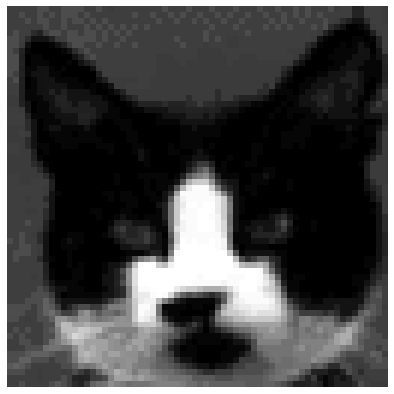

In [40]:
# According the pixels arranged in this dataset, it has to be transformed to plot the right images!
plt.figure(figsize = (15, 7))
plt.imshow(total_data.iloc[0].values.reshape(64, 64).T, cmap = "gray")
plt.axis(False)
plt.show()

In [58]:
dim_reducer = PCA(0.97) # Capturing the 97% of the Variance

In [61]:
pca_data = dim_reducer.fit_transform(total_data)

In [62]:
pca_data.shape

(160, 98)

In [60]:
# Getting the shape of the components
dim_reducer.components_.shape

(98, 4096)

In [63]:
pca_data = pd.DataFrame(pca_data)

In [64]:
pca_data

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,4048.831679,-1807.845837,-349.744087,232.820082,1131.702784,-1680.465976,872.709592,-719.216608,-570.550325,-121.135642,...,58.982138,-25.098344,4.793731,-6.426906,-17.818169,-101.986004,-300.935134,-44.723543,-46.898409,-66.474411
1,301.426743,-2841.584921,195.638050,642.942269,-820.152228,798.636015,-913.287579,-109.641233,34.403586,-1.006022,...,-341.405572,5.583721,366.552067,-62.371061,-62.807799,15.378379,-48.810286,31.536852,-33.135163,242.720733
2,3927.004244,3980.174808,-403.347706,-1274.071190,28.975473,-671.565490,645.264792,573.278639,1219.790282,-633.390240,...,-29.201798,134.814436,199.873548,234.924016,77.414502,-92.520946,30.031963,-138.921408,-94.127721,-34.587409
3,3129.332032,1172.618502,572.164306,-331.892209,-301.317865,682.511452,-502.849801,-442.378724,-364.178368,-344.766271,...,-99.779446,-22.945076,-67.822922,68.986650,-106.783307,-88.459341,-113.787184,15.953607,-50.661644,114.810080
4,3300.257216,-2455.928039,-120.787545,-1192.746892,486.588285,-1090.100287,116.918272,67.368075,-817.916949,402.197640,...,-132.221450,191.088975,163.259511,30.997074,-100.155013,4.301289,41.140037,-44.415514,1.689070,31.947323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,29.853557,1975.963379,-998.219301,-98.761702,-828.544752,-163.042499,-71.089192,256.682875,1173.006138,-45.561981,...,-82.598628,-13.054073,-14.362495,104.240244,96.802377,-71.753297,142.323281,-205.030051,85.443272,69.016042
156,874.313032,1838.168260,82.941398,945.598009,-9.972141,1550.479656,-302.470326,-502.032615,219.307546,-212.804773,...,13.527049,218.275978,-49.902840,-49.167871,-46.830908,-44.093737,-39.611682,-1.416333,-167.129796,-54.664146
157,-465.097858,-453.948617,2757.791682,1628.857044,-149.001095,-1432.707918,82.184304,-1782.735961,240.338627,1889.868490,...,-163.540699,126.339137,203.424708,-11.727433,113.867793,-75.363530,84.719042,60.617515,42.338224,-203.873338
158,-2046.931318,312.779787,772.927218,771.915058,609.093551,673.166162,177.260608,462.561029,282.152878,-570.696146,...,-149.131643,58.204448,55.868779,142.899438,-175.773483,-0.631705,151.557342,126.009706,133.377049,-105.189907


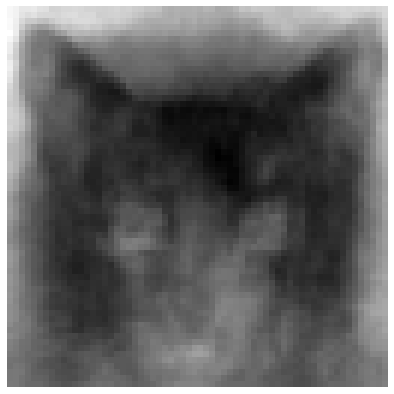

In [69]:
plt.figure(figsize = (15, 7))
plt.imshow(dim_reducer.components_[0].reshape(64, 64).T, cmap = "gray")
plt.axis(False)
plt.show()

In [70]:
"""
Inverse PCA Transformation belwo will not lead to the exact reconstruction of the original matrix, because
this property only holds when we have the number of PCs more than equal to the rank/features of the matrix.
Here, since, total features are 4096, & PCs selected are just 98, therefore, in the remaining dimensions, 
information is lost.
"""
inverse_pca_data = dim_reducer.inverse_transform(pca_data)

In [72]:
inverse_pca_data = pd.DataFrame(inverse_pca_data)

In [75]:
inverse_pca_data

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,85.026222,84.931578,86.300578,79.478811,75.562329,69.495807,65.633911,60.785228,68.776415,67.038796,...,77.517779,83.881233,83.352989,72.467911,49.823312,55.817711,64.432210,66.136045,63.574137,53.029099
1,-3.645207,13.382354,21.461327,26.611558,16.429143,-10.669668,-9.745133,-2.750793,7.251665,16.828164,...,100.275168,101.558422,98.585791,95.838380,87.393156,78.237746,68.212666,60.628318,62.170840,53.308888
2,250.809242,245.570156,242.152452,235.813522,229.615663,222.503303,230.562957,236.922890,232.942918,234.443571,...,239.384386,237.814045,238.962818,234.899227,237.100738,239.705308,241.626622,240.932454,234.865451,242.950617
3,126.514368,135.332148,143.359843,133.078934,137.144663,154.262331,144.321847,153.664689,158.582503,162.815503,...,81.452898,99.278539,88.802547,81.455654,73.492487,71.757848,81.485154,85.350474,86.491715,84.483718
4,72.123263,70.018821,63.690343,67.344203,75.302309,70.246817,65.694815,50.910033,45.523518,48.502507,...,25.916428,27.955072,35.250363,28.820752,19.153910,26.635040,33.724969,26.728648,23.746235,35.429321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,216.200161,218.180636,231.184015,224.934116,229.859828,218.909714,203.774753,201.549385,190.033549,188.554695,...,141.805380,147.210729,141.030508,141.795446,141.427314,138.331173,141.242058,152.402039,145.250521,150.639970
156,23.265916,55.160780,92.038299,109.516281,98.635632,101.808536,118.019511,127.343866,126.469466,124.036409,...,177.236404,175.627364,180.570066,177.941871,181.056144,180.900700,177.941862,177.092147,118.808941,46.347323
157,11.712492,11.769107,4.250330,8.203812,14.942461,1.841401,-6.130438,-11.268196,-12.194873,-11.947952,...,3.982188,10.749916,26.786534,35.298043,17.061149,10.025851,7.916112,6.129867,3.061415,-1.674859
158,46.801357,70.905250,53.123138,48.706967,18.348337,60.300290,33.900955,39.249874,75.206509,74.600442,...,171.484761,155.791142,164.607053,163.422183,178.172827,171.695849,170.898257,170.929581,156.598247,157.293858


In [76]:
total_data

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
C1,64,64,64,64,64,77,77,77,77,77,...,64,64,77,77,64,77,77,64,64,61
C2,23,23,20,20,9,9,9,4,4,4,...,108,108,108,108,89,65,51,31,23,9
C3,250,250,250,244,244,244,244,244,232,232,...,244,244,244,232,244,244,244,244,232,244
C4,137,137,137,144,151,151,151,158,151,151,...,74,89,89,78,78,78,100,102,124,124
C5,55,55,55,55,55,55,55,55,55,55,...,45,45,45,45,45,45,45,37,45,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D76,206,206,206,201,201,201,201,201,201,200,...,146,147,150,153,157,159,168,170,172,175
D77,3,44,112,136,120,120,125,122,129,133,...,186,184,181,180,179,173,170,192,119,14
D78,6,10,6,3,4,4,5,5,6,6,...,11,14,34,41,26,21,12,7,10,7
D79,30,69,69,69,30,69,30,30,69,69,...,177,159,160,160,177,159,159,163,140,140


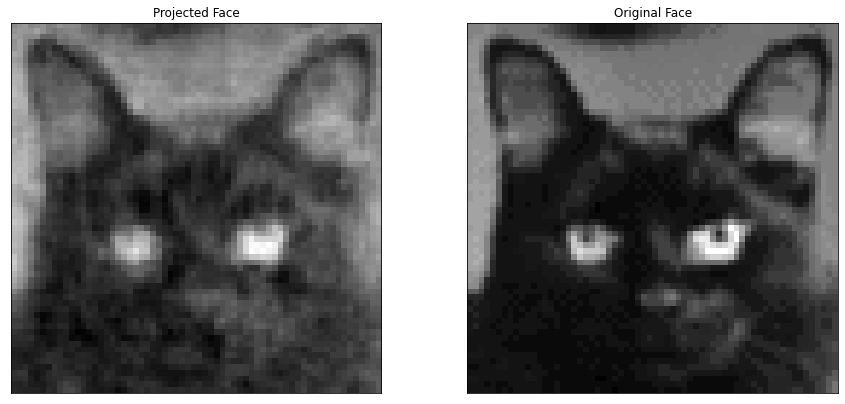

In [78]:
plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.title('Projected Face')
plt.imshow(inverse_pca_data.iloc[3].values.reshape(64,64).T,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.title('Original Face')
plt.imshow(cats_data.iloc[3].values.reshape(64,64).T,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [84]:
# Assigning 1 to Cats 🐱 & 0 to Dogs 🐕 
total_data["Target"] = [1 if i < 80 else 0 for i in range(total_data.shape[0])]

In [90]:
X = total_data.drop("Target", axis = 1)
y = total_data.Target

In [92]:
X

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
C1,64,64,64,64,64,77,77,77,77,77,...,64,64,77,77,64,77,77,64,64,61
C2,23,23,20,20,9,9,9,4,4,4,...,108,108,108,108,89,65,51,31,23,9
C3,250,250,250,244,244,244,244,244,232,232,...,244,244,244,232,244,244,244,244,232,244
C4,137,137,137,144,151,151,151,158,151,151,...,74,89,89,78,78,78,100,102,124,124
C5,55,55,55,55,55,55,55,55,55,55,...,45,45,45,45,45,45,45,37,45,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D76,206,206,206,201,201,201,201,201,201,200,...,146,147,150,153,157,159,168,170,172,175
D77,3,44,112,136,120,120,125,122,129,133,...,186,184,181,180,179,173,170,192,119,14
D78,6,10,6,3,4,4,5,5,6,6,...,11,14,34,41,26,21,12,7,10,7
D79,30,69,69,69,30,69,30,30,69,69,...,177,159,160,160,177,159,159,163,140,140


In [93]:
y

C1     1
C2     1
C3     1
C4     1
C5     1
      ..
D76    0
D77    0
D78    0
D79    0
D80    0
Name: Target, Length: 160, dtype: int64